<a href="https://colab.research.google.com/github/JeffersonEspinalA/Prueba/blob/main/Chapter_2_Basic_Measures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  >=3.7<br/>
<b>Networkx version:</b>  >=2.3<br/>
<b>Last update:</b> 15/02/2021
</span>

<a id='top'></a>
# *Chapter 2: Basic Measures*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)

**Note 2:** textbooks approaching network analysis (practice and theory) using ``networkx`` are: 

<table>
    <tr>
         <td>
        <img width=150px src="img/book.jpg" align="center"/>
        </td>
         <td>
        <img width=150px src="img/book2.jpg" align="center"/>
        </td>
    </tr>
     <tr>
         <td>
         <b>"Complex Network Analysis in Python"</b> <br/> 
         Dmitry Zinoviev, The Pragmatic Programmer. 2018.
         </td>
         <td>
         <b>"Firstcourse in network science"</b> <br/> 
         Menczer, Fortunato, and Davis. 2020.
         </td>
    </tr>
</table>

## Installation
To install ``networkx`` use the following command:

    pip install networkx

## Importing the library
As a first step just import the ``networkx`` library.

In [1]:
!pip install powerlaw
!pip install networkx==2.8.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.8-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [2]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In our example we will not only analyse graphs but also visualise them: for this reason we have to import also ``matplotlib``.

In [3]:
%matplotlib inline 

## Design our first graph

``networkx`` provides support for several graph models. 

Among them:
- undirected graphs, available through the ``Graph`` class
- directed graphs, available through the ``DiGraph`` class

In this brief tutorial we will focus only on undirected graphs.

We can build a graph adding nodes as well as edges as follows:

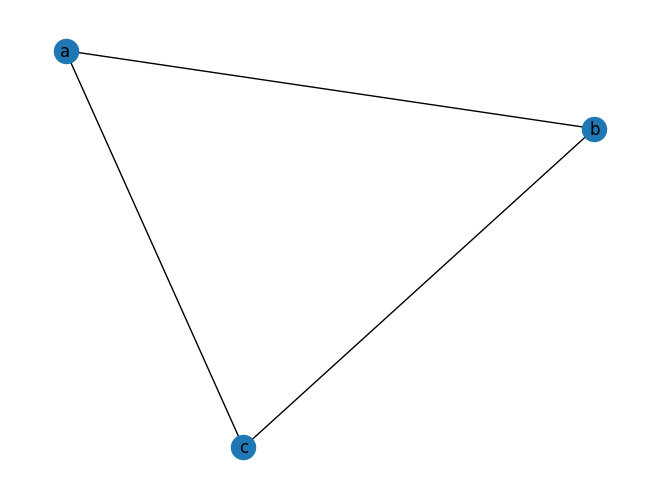

In [4]:
g = nx.Graph()

g.add_node("a")
g.add_edge("a", "b")
g.add_edge("a", "c")
g.add_edge("b", "c")

nx.draw(g ,with_labels=True)

Nodes and edges can also be easly removed

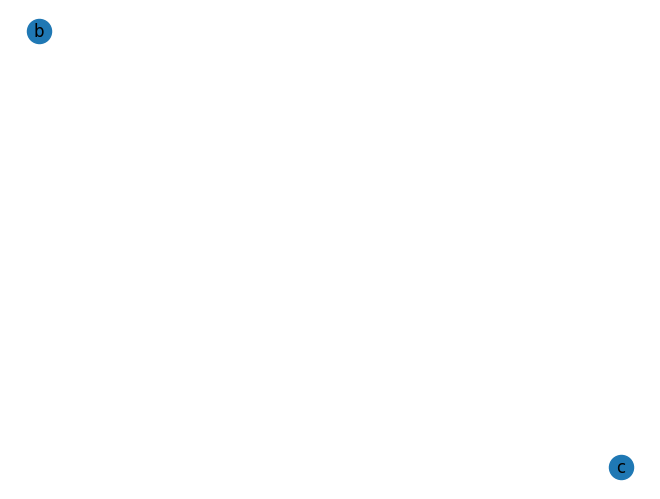

In [5]:
g.remove_node("a")
g.remove_edge("b", "c")

#re-draw the graph
nx.draw(g, with_labels=True)

## Reading a graph from file
``networkx`` natively supports several network file formats.

Among them one the most frequently used in online repository is the *edgelist* one.

An edge list is a text file (usually saved as .csv) in which each line identifies an edge. <br/>
For instance, the triangle defined before can be described as:

    a,b
    b,c
    c,a

To read edgelist file just write

In [6]:
g = nx.read_edgelist("network.csv", delimiter=",", nodetype=int)

Similarly a graph can be written to file using ``nx.write_edgelist(g, filename)``.

For all the I/O methods refer to the [official documentation](https://networkx.github.io/documentation/latest/reference/readwrite/index.html)

## Accessing nodes and edges
Given a ``Graph`` object is it possible to iterate over its nodes with a simple ``for`` loop

In [7]:
for n in g.nodes():
    # do something
    pass

Following a similar rationale is it also possible to loop over the edge set

In [8]:
for e in g.edges():
    # do something
    pass

All graph entities can be used to store additional attributes (weights, labels...). 

For furhter details refer to the [official documentation](https://networkx.github.io/documentation/latest/tutorial.html#adding-attributes-to-graphs-nodes-and-edges)

## Network base statistics
``networkx`` allows to manipulate nodes as well as edges, count them, and extract relevant global features.

In [9]:
g.number_of_nodes()

2566

In [10]:
g.number_of_edges()

8593

In [11]:
g.is_directed()

False

## Degrees and Degree distribution
Node degree can be easily obtained as follows:

In [12]:
g.degree(1) # degree for node 1

24

Similarly the average degree can be computed with

In [13]:
sum(dict(g.degree()).values())/float(len(g))

6.697583787996883

An easy way to compute, and visualise, the degree distribution is the following

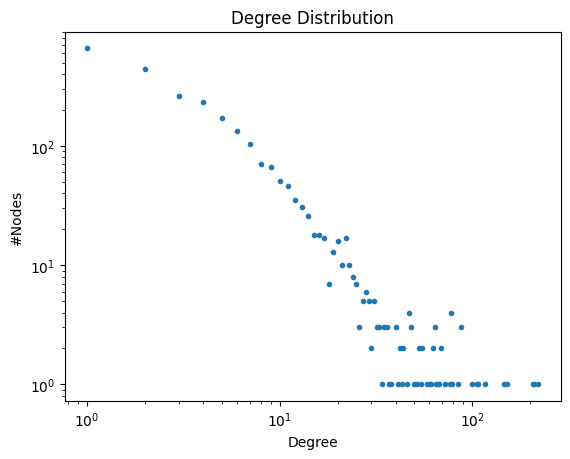

In [14]:
hist = nx.degree_histogram(g)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()

A more complete one instead is...

In [15]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


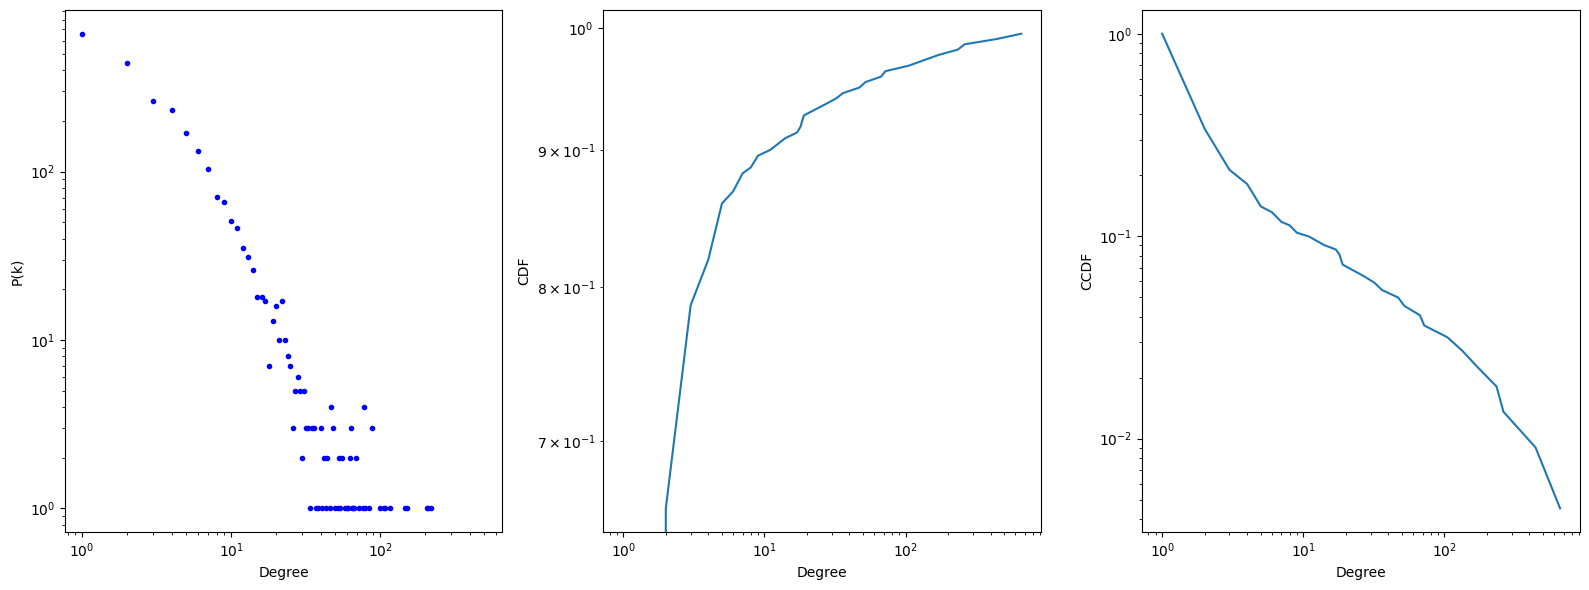

In [16]:
plot_dist(g)

## Graph components
``networkx`` allows to select node specific views of the original graph

In [17]:
list(g.neighbors(0)) # obtain the list of neighobors for node 0

[306, 830, 1599, 273, 1988]

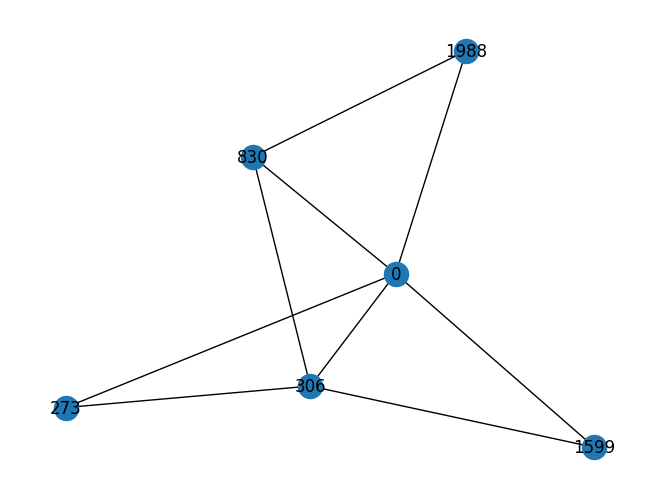

In [18]:
ego = nx.ego_graph(g, 0) # ego network of the node 0
nx.draw(ego, with_labels=True)

Using the same rationale also connected components can be extracted

In [19]:
nx.number_connected_components(g)

85

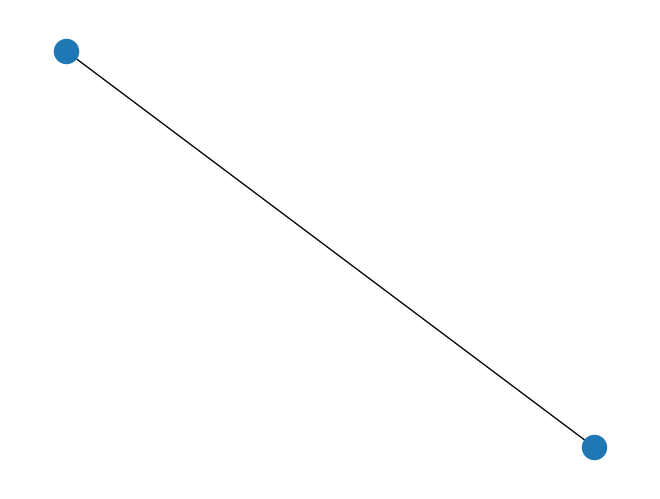

In [20]:
comps = list(nx.connected_components(g)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(g, comps[1]) # build a subgraph on the second component
nx.draw(comp_1)

## Paths and Diameter
Shortest paths can be extracted as well using the following syntax

In [21]:
nx.shortest_path(g, source=0, target=30)

[0, 306, 30]

In [22]:
nx.shortest_path_length(g, source=0, target=30)

2

Moreover, the network diameter can be computed as follows

In [23]:
nx.diameter(g.subgraph(comps[0])) # we compute the diameter on the giant component

17

## Triangles, density and clustering
Other indexes that can be computed using the library are 

In [24]:
nx.density(g)

0.002611143776996835

In [25]:
nx.triangles(g)[0] # count the triangles each node is involved in (and access the value of node 0)

4

In [26]:
nx.clustering(g)[0] # compute the local clustering coefficient for all nodes (and access the value for node 0)

0.4

In [27]:
nx.average_clustering(g) # compute the global clustering coefficient

0.20063633264589634